# Introduction To M5 Competition

In [2]:
from keras import backend as K
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks.callbacks import History
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import dask.dataframe as dd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sbn
import itertools
%matplotlib inline

# Data Processing

In [3]:
calendar=pd.read_csv('calendar.csv')
sales_train_validation=pd.read_csv('sales_train_validation.csv')
sell_prices=pd.read_csv('sell_prices.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [4]:
calendar.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
sales_train_validation.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1

In [6]:
sales_train_validation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [7]:
food=sales_train_validation[sales_train_validation['cat_id']=='FOODS']

In [8]:
food.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,4,2,0,2,0,0,0,0,3,1,3,0,2,1,2,0,2,1,2,0,2,2,2,4,2,2,0,2,1,7,1,2,3,0,1,2,3,0,1,5,0,0,1,0,0,1,1,1,1,1,0,1,2,2,0,1,0,0,0,0,0,4,0,1,0,1,0,2,2,1,1,0,2,1,2,0,2,0,0,0,1,0,0,0,0,0,0,3,2,7,1,0,0,9,0,0,0,1,2,0,1,3,1,3,0,0,1,1,1,3,0,1,2,0,6,3,1,0,1,0,2,0,0,0,0,0,1,4,0,0,3,0,1,1,0,2,3,2,3,1,1,0,2,1,0,1,0,0,0,0,3,0,1,0,1,0,1,2,0,0,4,0,1,1,1,1,1,1,1,2,0,2,0,0,0,1,0,2,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,4,0,0,0,0,0,1,2,3,0,0,0,0,2,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0,1,4,1,0,0,0,1,0,1,0,0,2,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,2,0,1,0,1,0,1,1,6,0,0,1,1,1,1,0,2,1,0,1,0,0,1,0,3,0,0,2,4,1,1,1,0,4,0,1,0,0,0,2,0,0,1,2,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,3,

In [9]:
food_agg=food.groupby('dept_id').sum()
food_agg=food_agg.transpose()
food_agg.reset_index()

In [12]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [13]:
food_agg=reduce_mem_usage(food_agg)

Mem. usage decreased to  0.03 Mb (56.2% reduction)


In [14]:
food_agg=pd.merge(food_agg,calendar[['date','d']],left_on=food_agg.index,right_on='d')

In [15]:
food_agg.head(3)

,FOODS_1,FOODS_2,FOODS_3,date,d
0,2343,4094,16741,2011-01-29,d_1
1,2216,4209,16333,2011-01-30,d_2
2,1657,3174,12343,2011-01-31,d_3


In [16]:
food_agg=food_agg.set_index('date')

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result3 = seasonal_decompose(food_agg.iloc[1080:1900,2],freq=28)
result2 = seasonal_decompose(food_agg.iloc[1080:1900,1],freq=28)
result1 = seasonal_decompose(food_agg.iloc[1080:1900,0],freq=28)

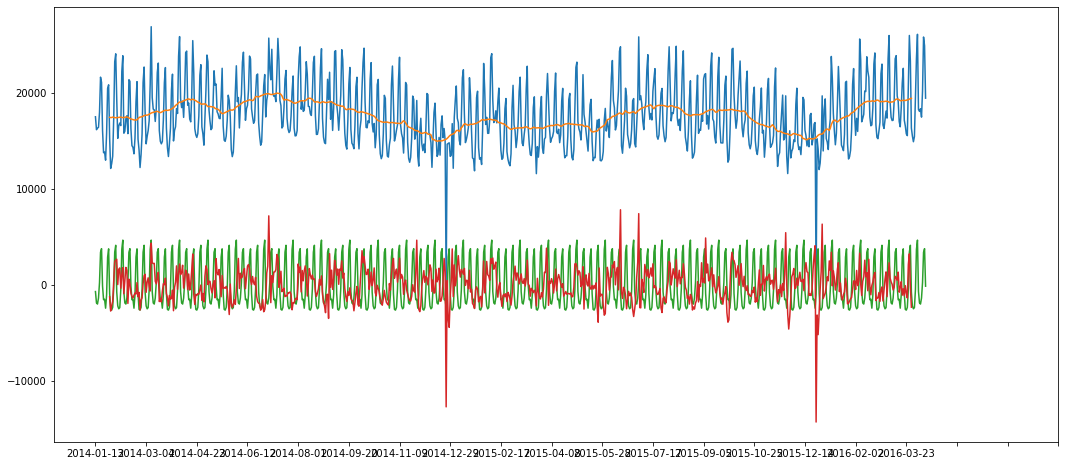

In [23]:
plt.figure(figsize=(18,8))
plt.plot(result3.observed)
plt.plot(result3.trend)
plt.plot(result3.seasonal)
plt.plot(result3.resid)
plt.xticks(ticks=[i for i in range(0,1000,50)])
plt.show()

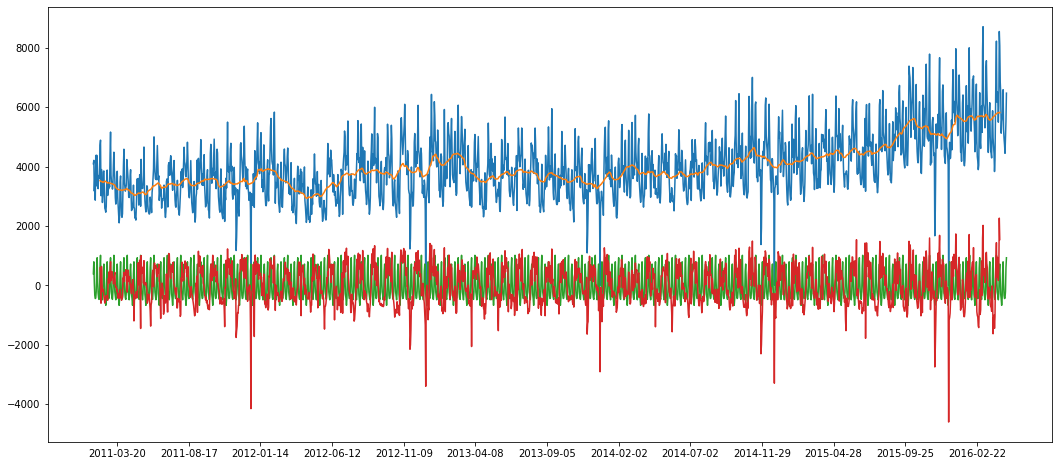

In [91]:
plt.figure(figsize=(18,8))
plt.plot(result2.observed)
plt.plot(result2.trend)
plt.plot(result2.seasonal)
plt.plot(result2.resid)
plt.xticks(ticks=[i for i in range(50,1900,150)])
plt.show()

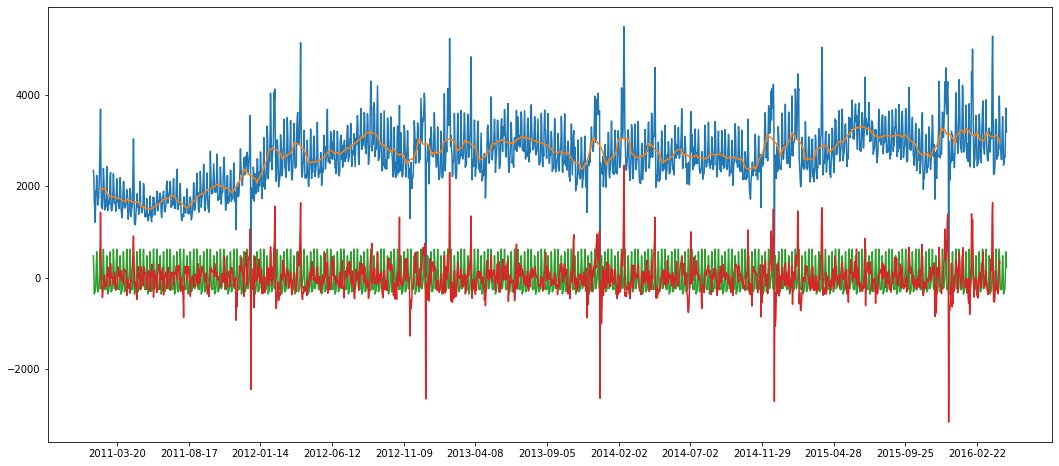

In [92]:
plt.figure(figsize=(18,8))
plt.plot(result1.observed)
plt.plot(result1.trend)
plt.plot(result1.seasonal)
plt.plot(result1.resid)
plt.xticks(ticks=[i for i in range(50,1900,150)])
plt.show()

In [519]:
def variblesXandY(list_values,step_size,row_size):
    df=[]
    colnames=[str(k) for k in range(step_size)]
    colnames.append('target')
    for i in range(row_size):
        df.append(pd.DataFrame(columns=colnames))
    index_range=len(list_values)-((step_size+1)*row_size)+1
    for i in range(0,index_range,row_size):
        inner_list=list_values[i:i+(step_size+1)*row_size]
        x=np.array(inner_list).reshape(step_size+1,row_size).transpose()
        for j in range(7):
            df[j].loc[len(df[j]), :] = list(x[j])  
    return df

def model_fit_and_predict(data):
    pred=[]
    model=[]
    for i in range(len(data)):
        X=data[i].drop('target',axis=1)
        y=data[i]['target']
        model.append(RandomForestRegressor(n_estimators=120,criterion='mse'))
        model[i].fit(X,y)
        X_for_pred=X_for_predition(X.values[-1].tolist(),y.values[-1])
        pred.append([])
        for j in range(8):
            p=int(model[i].predict(X_for_pred))
            pred[i].append(p)
            X_for_pred=X_for_predition(X_for_pred.values[-1].tolist(),p)
    return pred

def X_for_predition(X,y):
    X.pop(0)
    X.append(y)
    X=pd.DataFrame(X).transpose()
    return X

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [531]:
sales_train_validation=reduce_mem_usage(sales_train_validation)

Mem. usage decreased to 95.00 Mb (78.7% reduction)


In [560]:
col_names=sample_submission.columns
validation_df1=pd.DataFrame(columns=col_names)
evaluation_df2=pd.DataFrame(columns=col_names)
step_size=12
n_features=7

In [561]:
import time
start = time.time()
for i,id_row in enumerate(sales_train_validation['id']):
    data=variblesXandY(sales_train_validation.iloc[i,8:],step_size,n_features)
    predicted_series=model_fit_and_predict(data)
    b_list=np.array(predicted_series).transpose().reshape(56).tolist()
    validation_df.loc[len(validation_df), :] =[id_row]+b_list[0:28]
    id_row=id_row.replace('validation','evaluation')
    evaluation_df.loc[len(evaluation_df), :]=[id_row]+b_list[28:]
end = time.time()
print(end - start)

52549.865157842636


In [562]:
validation_df.head(10)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0
3,HOBBIES_1_004_CA_1_validation,2,1,1,1,1,2,2,3,1,1,1,1,1,3,2,1,1,1,1,3,4,1,1,0,1,1,2,2
4,HOBBIES_1_005_CA_1_validation,0,1,1,0,0,1,1,0,0,1,0,0,1,2,0,0,0,1,0,1,1,0,0,1,1,1,1,1
5,HOBBIES_1_006_CA_1_validation,0,1,1,2,0,1,0,1,0,1,3,0,2,0,2,0,1,1,1,1,0,2,1,1,1,0,0,0
6,HOBBIES_1_007_CA_1_validation,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,9,6,7,10,12,13,9,11,9,6,12,5,11,7,15,4,10,6,8,12,10,13,12,7,6,7,15,8
8,HOBBIES_1_009_CA_1_validation,0,2,0,0,0,0,0,0,2,0,0,0,0,1,1,3,0,0,0,0,1,2,3,0,0,0,0,1
9,HOBBIES_1_010_CA_1_validation,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [563]:
evaluation_df.head(19)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0,1,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,HOBBIES_1_004_CA_1_evaluation,0,0,1,1,2,2,1,1,1,1,0,1,3,3,2,0,0,2,2,1,3,2,0,1,1,1,4,2
4,HOBBIES_1_005_CA_1_evaluation,0,0,1,0,0,1,1,0,0,0,1,2,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0
5,HOBBIES_1_006_CA_1_evaluation,0,1,1,2,1,1,1,2,0,1,1,0,0,0,1,0,0,1,0,0,0,2,1,0,1,1,0,0
6,HOBBIES_1_007_CA_1_evaluation,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_evaluation,12,8,7,8,7,14,8,11,6,6,4,8,11,5,13,10,8,12,8,10,7,8,4,7,4,7,11,7
8,HOBBIES_1_009_CA_1_evaluation,1,2,0,0,0,0,1,1,2,0,0,0,0,1,0,2,0,0,0,0,1,0,4,0,0,0,0,1
9,HOBBIES_1_010_CA_1_evaluation,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [551]:
sales_train_validation.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1

In [564]:
output=validation_df.append(evaluation_df)

In [565]:
output.shape

(60980, 29)

In [568]:
output.tail(10)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
30480,FOODS_3_818_WI_3_evaluation,3,0,1,1,0,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,2,1,1,1,1
30481,FOODS_3_819_WI_3_evaluation,1,1,1,1,3,2,0,1,3,1,2,2,1,2,1,1,1,1,2,2,1,2,1,2,1,1,1,1
30482,FOODS_3_820_WI_3_evaluation,1,1,1,0,2,2,2,0,1,1,1,2,2,1,0,1,1,1,2,2,1,0,1,1,0,2,1,1
30483,FOODS_3_821_WI_3_evaluation,1,0,0,1,1,1,1,0,0,0,0,0,2,1,0,0,0,1,0,1,0,1,0,0,0,0,2,2
30484,FOODS_3_822_WI_3_evaluation,2,1,1,3,1,3,2,2,1,2,1,1,2,2,2,2,2,2,1,3,2,3,2,2,2,1,2,3
30485,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_evaluation,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30488,FOODS_3_826_WI_3_evaluation,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
30489,FOODS_3_827_WI_3_evaluation,1,1,1,1,1,2,2,1,1,1,0,1,1,1,2,1,2,0,1,1,0,2,2,1,1,1,1,1


In [567]:
output.to_csv('sample_submission.csv',index=False)

In [566]:
sample_submission.shape

(60980, 29)

In [470]:
data=variblesXandY(list(food_agg['FOODS_1']),12,7)
pred_series=model_fit_and_predict(data)

In [474]:
pred_series

[[3609, 3508, 3499, 3527, 3538, 3478, 3457, 3431],
 [3251, 3217, 3264, 3229, 3193, 3252, 3228, 3149],
 [2781, 2775, 2598, 2639, 2824, 2712, 2526, 2639],
 [2794, 2775, 2798, 2675, 2705, 2688, 2667, 2674],
 [2934, 2851, 2988, 3004, 2885, 2931, 2911, 2749],
 [2974, 2961, 2876, 3346, 3061, 2930, 2992, 2950],
 [3374, 3411, 3383, 3294, 3334, 3362, 3441, 3404]]

In [413]:
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.003, random_state=742)
model=RandomForestRegressor(n_estimators=200,criterion='mse')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [414]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [415]:
print(math.sqrt(mean_squared_error(y_train,y_train_pred)))
print(math.sqrt(mean_squared_error(y_test,y_test_pred)))

156.82308807618222
49.690000000000055


In [432]:
y_train.values[-1]

3425.0

In [416]:
X_train.loc[len(X_train)-1,:]

0     4333.0
1     4207.0
2     3775.0
3     3806.0
5     3550.0
6     3577.0
7     3755.0
8     3891.0
9     3273.0
10    5285.0
11    3466.0
12    3974.0
Name: 259, dtype: float64

In [419]:
A=pd.DataFrame(X_train.loc[len(X_train)-1,:]).transpose()

In [446]:
def X_for_predition(X,y):
    X.pop(0)
    X.append(y)
    X=pd.DataFrame(X).transpose()
    return X

In [449]:
a=X_for_predition(X_train.values[-1].tolist(),y_train.values[-1])

In [450]:
a.values[-1].tolist()

[3167.0,
 3140.0,
 3272.0,
 3653.0,
 3687.0,
 3362.0,
 3507.0,
 3883.0,
 3800.0,
 3819.0,
 3612.0,
 3425.0]

In [448]:
model.predict(X_for_predition(X_train.values[-1].tolist(),y_train.values[-1]))

array([3664.385])

In [422]:
y_test

2    2275.0
Name: 4, dtype: float64

In [435]:
y_train.values[-1]

3425.0

In [434]:
X_train.values[-1].tolist()

[5043.0,
 3167.0,
 3140.0,
 3272.0,
 3653.0,
 3687.0,
 3362.0,
 3507.0,
 3883.0,
 3800.0,
 3819.0,
 3612.0]

In [177]:
df=pd.DataFrame()

In [187]:
df=[]
for i in range(7):
    df.append(pd.DataFrame(columns=list('ABCD')))
x=[1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1]
x=np.array(x).reshape(4,7).transpose()

In [188]:
for j in range(7):
    df[j].loc[len(df[j]), :] = list(x[j])

In [190]:
df[2]

,A,B,C,D
0,3,1,8,6


In [132]:
df

,0,1,2,3,4,5,6,7,8
0,1,3,5,7,9,2,4,6,8
1,2,4,6,8,1,3,5,7,9


In [58]:
colnames=['row_'+str(i) for i in range(7)]
colnames

['row_0', 'row_1', 'row_2', 'row_3', 'row_4', 'row_5', 'row_6']

In [ ]:
for ind, val in enumerate(list_values[last_index:(last_index+row_size)]):
    dummy[ind].append(val)
                    

In [45]:
for i,j in enumerate(x[0]):
    print(i,j)

0 1
1 2
2 3
3 2
4 4


In [ ]:
predicted=[]
for i in range(3):
    X,y=variblesXandY(food_agg.iloc[0:1820,i],step_size,n_features)
    predicted_series=model_fit_and_predict(X,y)
    b_list=list(itertools.chain.from_iterable(predicted_series))
    predicted.append(b_list)
predicted_list=list(map(list, zip(*predicted)))
index=food_agg.index[1820:-2]
predicted_food=pd.DataFrame(data=predicted_list,columns=['FOODS_1_P','FOODS_2_P','FOODS_3_P'],index=index)
total_food=food_agg.join(predicted_food).dropna()